# Exploratory Data Analysis

This section instead, is all about visualizing the data from a human side, observing filtered_dataset.csv and the statistical analysis on the machine side, using cleaned_dataset.csv

## Visual Analysis

### Analyzing class imbalance

After having obtained the filtered dataset with the relevant columns we are interested in we can visualize and derive some conclusions from the data.

Is_hit
0    14890
1     1650
Name: count, dtype: int64

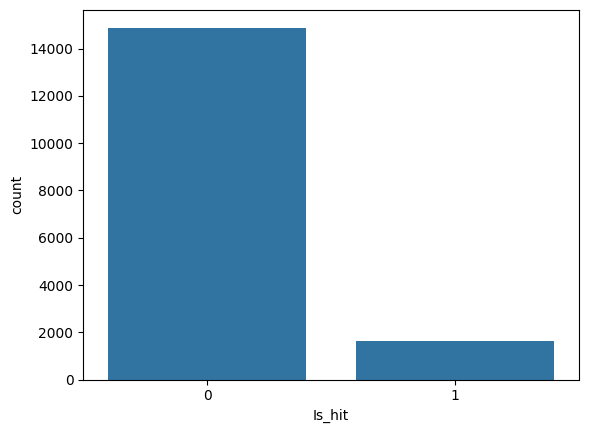

In [1]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

df_filtered = pd.read_csv("filtered_dataset.csv")
df_encoded = pd.read_csv("cleaned_dataset.csv")

sns.countplot(data=df_filtered, x='Is_hit')

df_filtered['Is_hit'].value_counts()

As we can see the dataset is unbalanced. Out of the total ~16k data entries, only 1650 are counted as hits which reflects our arbitrary filter of a 'Hit' being considered so only if it is in the top 90th quartile of its platform sales

### Genre to platform performance

<Axes: xlabel='Genre', ylabel='count'>

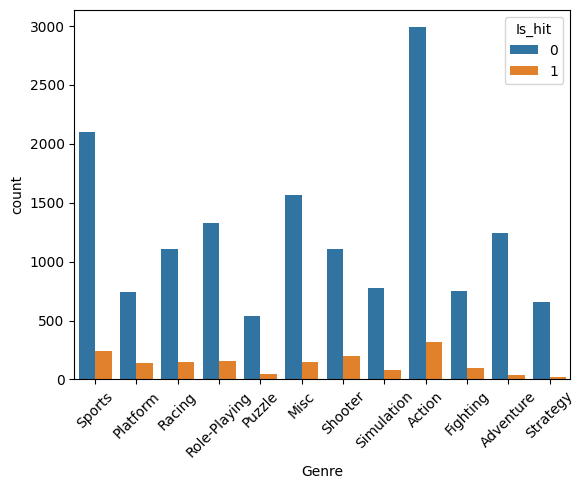

In [3]:
plt.xticks(rotation=45)
sns.countplot(data=df_filtered, x='Genre', hue='Is_hit')

At a first glance, the genres that have the highest amount of releases are Action and Sports respectively. However, if we're looking at the Hit-to-Flop ratio, Shooter and Role-Playing games perform better. Conversely, Adventure games appear to not be a good predictor of success.

In [ ]:
plt.figure(figsize=(15, 6))
sns.countplot(data=df_filtered, x='Platform', hue='Is_hit')
plt.xticks(rotation=90)
plt.show()

Looking at platforms, the NES and the GameBoy have really high hit rates. But, this is probably survivorship bias because the data collection might be incomplete. On the other hand platforms that have many released titles, like DS or PS2, have a lower hit rate. Some explanations on this could be: the market is saturated, with many titles comes market saturation, only first-party titles ever make it and there are many "shovelware" titles.

### Sales distribution

In [ ]:
sns.boxplot(x='Is_hit', y='Global_Sales', data=df_filtered)

This boxplot shows the distribution of Global Sales. As we can see it is incredibly skewed. It is also helpful as it helps us understand that Hits usually are the titles that have at least 5M sales.

### Trend over time

In [ ]:
df_filtered.groupby('Year')['Is_hit'].sum().plot()

Game releases in this dataset match the 7th generation console boom in 2008-2009. We can also notice that the data has an abnormal trough in 2007. Unfortunately this dataset's releases decline after 2008 and don't have any after 2017.

## Statistical analysis

### Correlation heatmap

In [ ]:
correlation_matrix = df_encoded.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=False, cmap='magma')
plt.show()

This heatmap is a useful proof for multicollinearity. It demonstrates the correlation between every pair of features. As we can observe, multicollinearity is low as the correlation appears to be on the lower side for almost all pairs. This is a beneficial because each variable provides unique insights and is not redundant. Low multicollinearity makes our training stable.

### Pair plot

In [ ]:
sns.pairplot(df_encoded[['Year', 'Publisher', 'Global_Sales', 'Is_hit']], hue='Is_hit')

Finally, we get an idea of which approach to use in developing our models.

Looking at the Global Sales Plot, we have no problem drawing lines between the successful games (the Hits), and those that were unsuccessful (the Flops). However, looking at the plots for the Publisher and Year Variables, there is a significant amount of overlap between the Hits and Flops data for each Variable. Since it is difficult to tell where one group ends, and another begins, simply using either Publisher or Year as the variable on its own, is unlikely to give us accurate predictions of whether or not a game will be a Hit, or a Flop.

Therefore, we should expect a simple model (such as a linear regression) to have difficulty with making accurate predictions. As a result, we will want to develop more complex models to account for the complexity of the data boundaries.